# Gold Prices App

Many aspects of the appearances can be configured. One simple way to change the way a graph looks is to use templates.

In [ ]:
import dash
from dash import html
from dash import dcc
import plotly.express as px
import pandas as pd

### Read Data

In [ ]:
# Read input data
data = pd.read_csv('precious_metals_prices_2018_2021.csv', usecols=['DateTime', 'Gold'])

### Create figure using Plotly Express

In [ ]:
# create a plotly figure
fig = px.line(data, x='DateTime', y='Gold', title='Precious Metal Prices')

This is how the original plot looks like - 

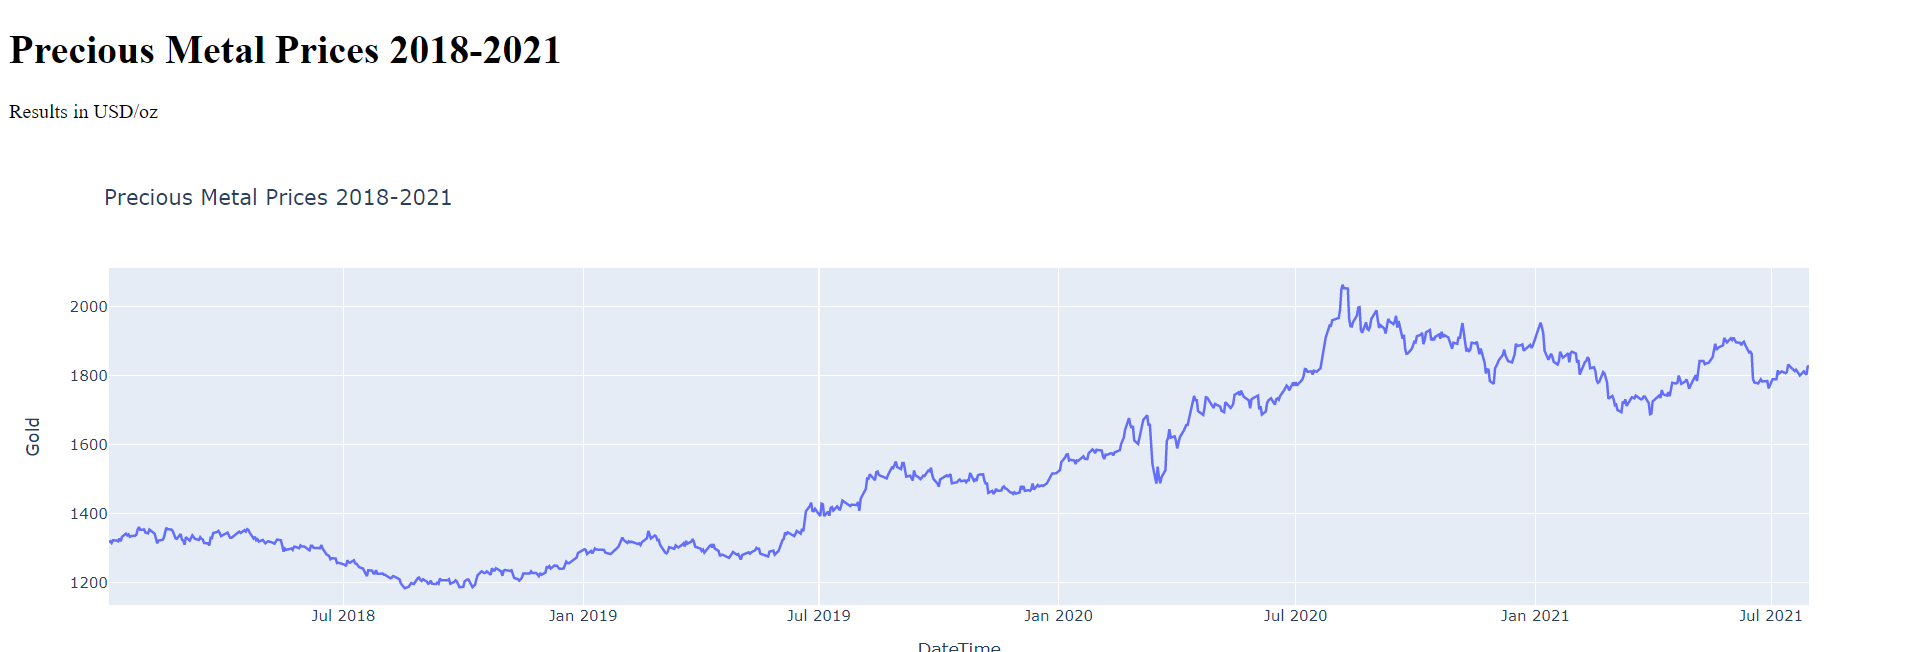

### Update the figure using template

In [ ]:
fig.update_layout(
    template = 'plotly_dark'
)

After adding the template

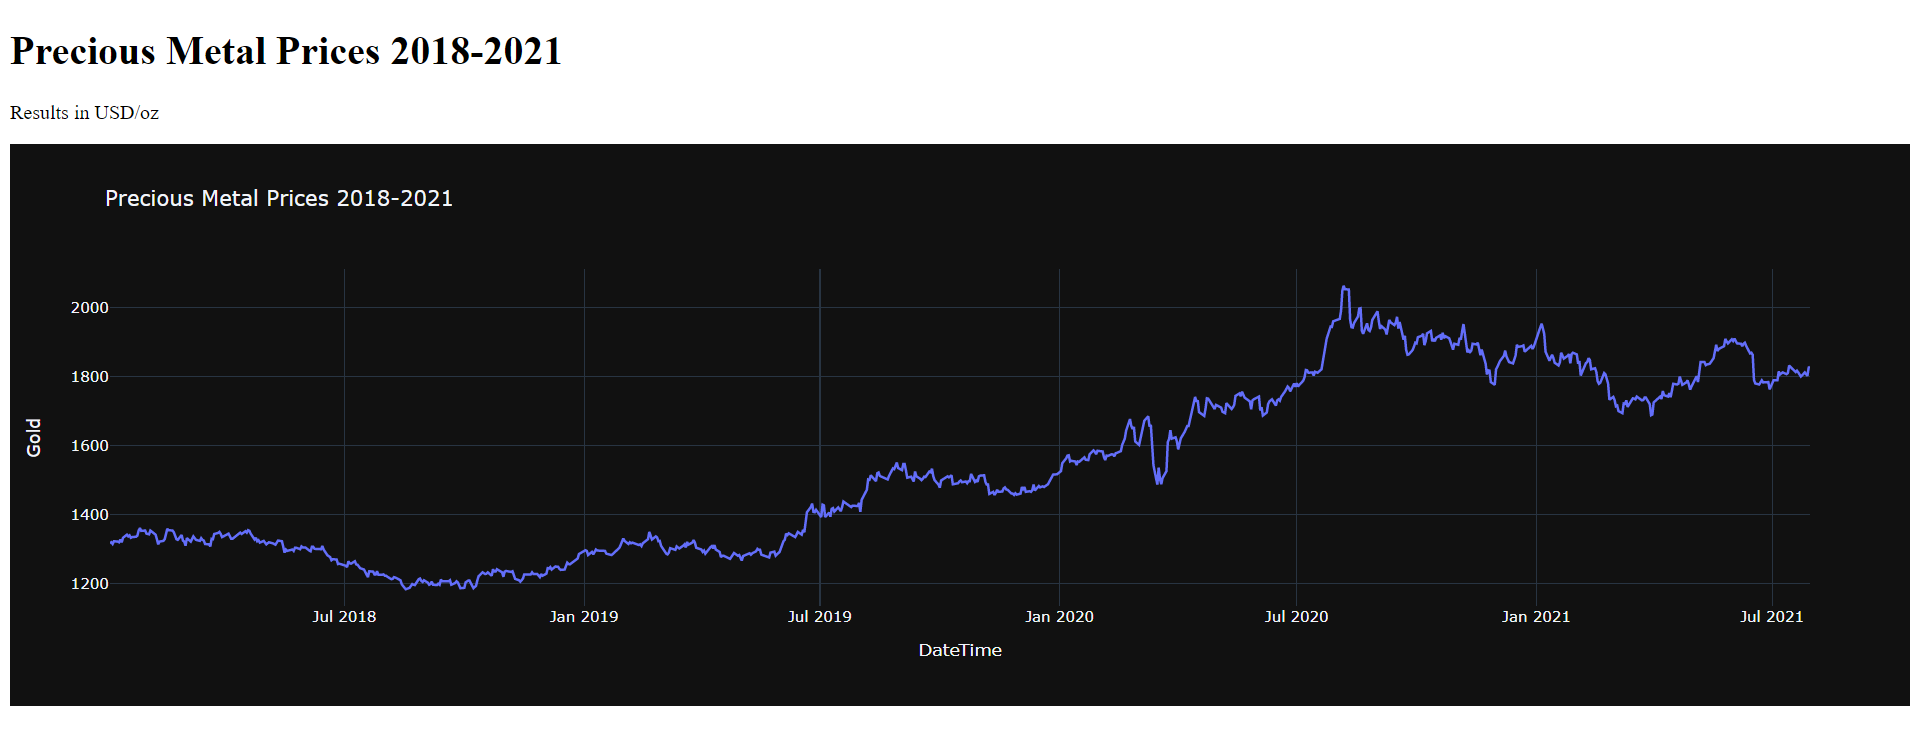

Templates can take many different values - Refer templates.py for all available templates

In [ ]:
# Let's update other params

fig.update_layout(
    template = 'plotly_dark',
    xaxis_title = 'Custom X-Axis Title : Date',
    yaxis_title = 'Custom Y-Axis Title : Price',
    font = {
        'family' : 'Verdana, sans-serif',
        'size' : 24,
        'color' : 'teal'
    }
)

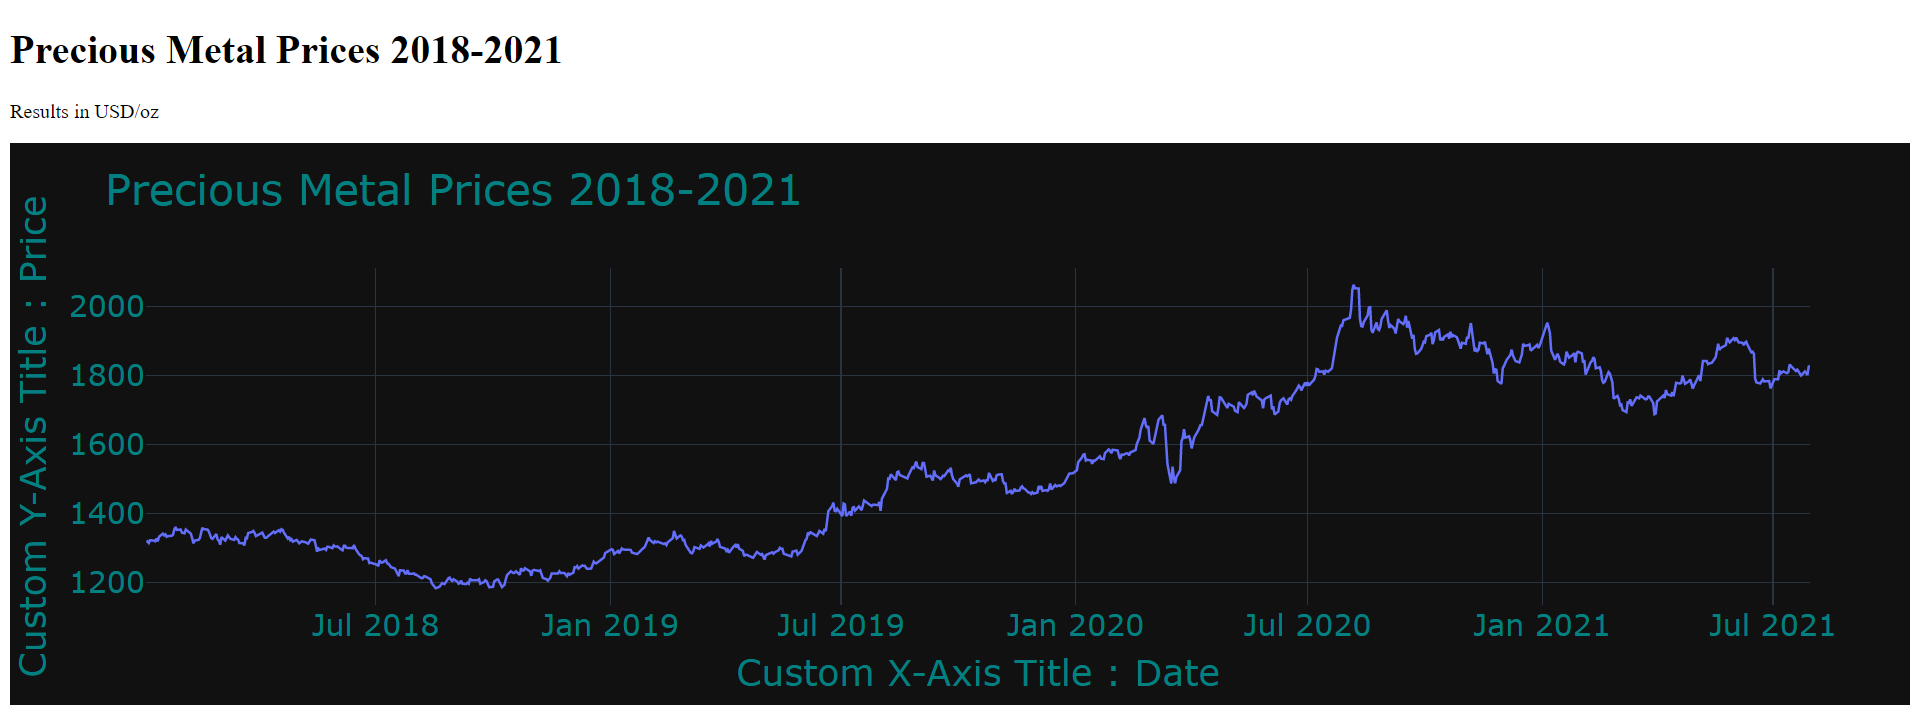

Obviously, these params are only for demo. Ideally, axes' titles will be shorter, font size lower and colors a bit sane!

We can add custom colors for each variables in the plot, which will by default add the labels

In [ ]:
# Create a plotly figure for use by dcc.Graph()
fig = px.line(data,
              title="Precious Metal Prices 2018-2021",
              x="DateTime",
              y=["Gold"], # Notice now y is a list - otherwise color_discrete_map won't work!
              color_discrete_map={'Gold' : 'gold'})

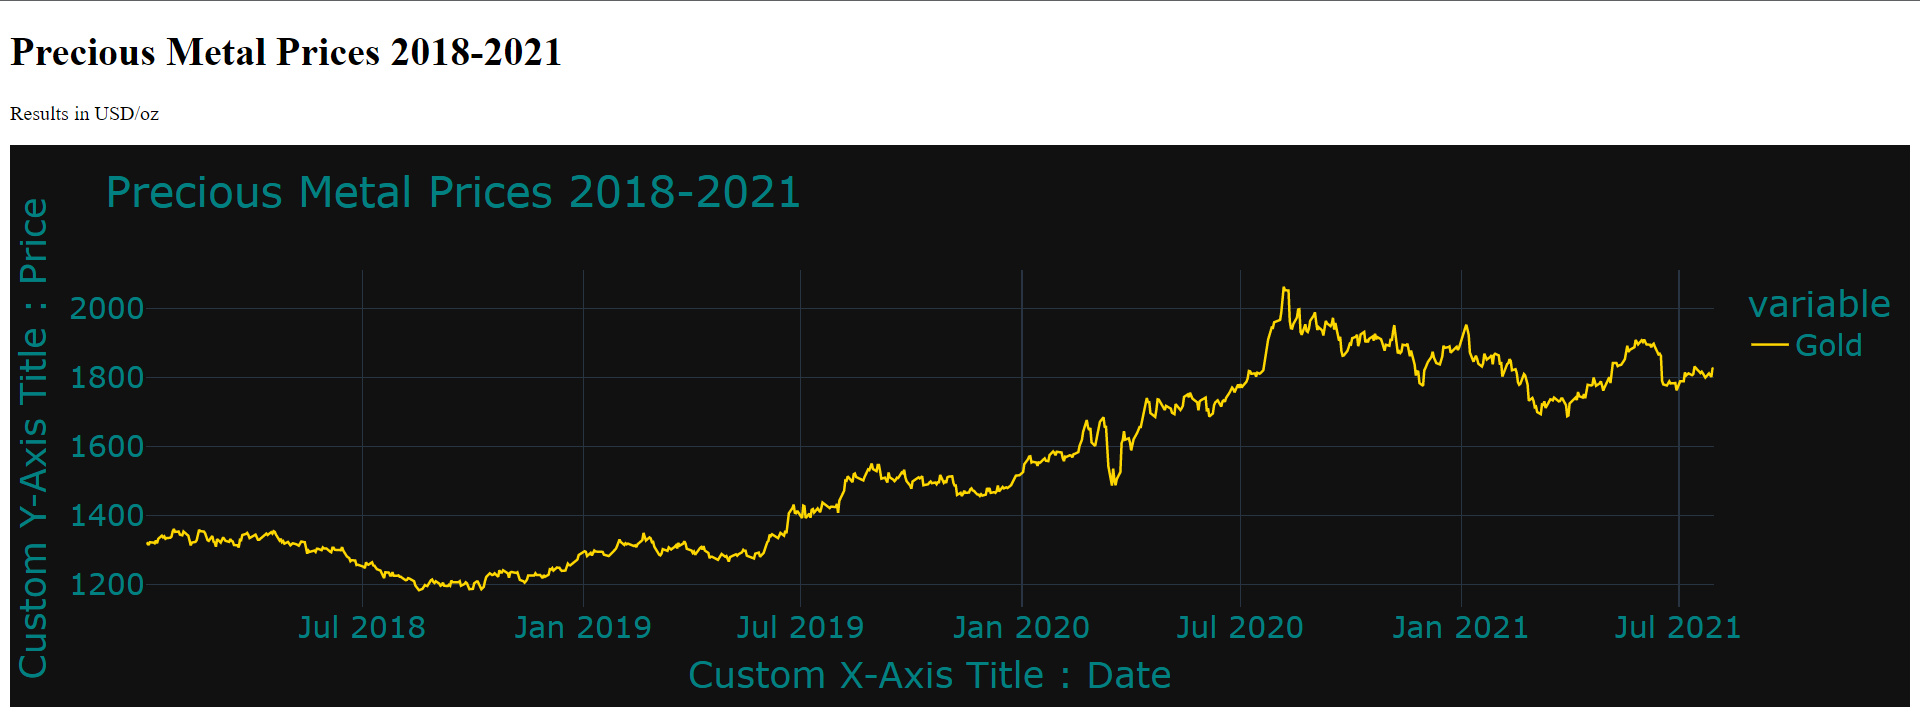

### Define App Layout

In [ ]:
app = dash.Dash(__name__)
app.title = 'Precious Metal Prices'

app.layout = html.Div(
    id='app-container',
    children=[
        html.H1('Precious Metal Prices'),
        html.P('Results in USD/oz'),
        dcc.Graph(figure=fig)
    ]
)

### Run the app

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)